# Installation

In [5]:
# uncomment the line below and run this code cell once
# %run '../scripts/package_install.py'

In [71]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import OneHotEncoder
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt


# Loading Dataset From TDC package

In [7]:
# uncomment the line below and run this code cell once
#%run '../scripts/data_loader.py'

In [8]:
train = pd.read_csv('../data/train.csv')
valid = pd.read_csv('../data/valid.csv')
test = pd.read_csv('../data/test.csv')

# Exploratory Data Analysis

In [9]:
print(f'The shape of the training set is:{train.shape}')
print(f'The shape of the cross-validation set is:{valid.shape}')
print(f'The shape of the test set is:{test.shape}')

The shape of the training set is:(134265, 6)
The shape of the cross-validation set is:(19181, 6)
The shape of the test set is:(38362, 6)


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134265 entries, 0 to 134264
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  134265 non-null  int64 
 1   Drug1_ID    134265 non-null  object
 2   Drug1       134265 non-null  object
 3   Drug2_ID    134265 non-null  object
 4   Drug2       134265 non-null  object
 5   Y           134265 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 6.1+ MB


### train.info() returns information about the train dataset, namely the column names, and their data types
From the result above, the first column is the serial number. The dataset will be cleaned and the first column removed

In [11]:
train = train.drop(train.columns[0], axis=1)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134265 entries, 0 to 134264
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Drug1_ID  134265 non-null  object
 1   Drug1     134265 non-null  object
 2   Drug2_ID  134265 non-null  object
 3   Drug2     134265 non-null  object
 4   Y         134265 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 5.1+ MB


In [39]:
train.head()

,Drug1_ID,Drug1,Drug2_ID,Drug2,Y
0,DB04571,CC1=CC2=CC3=C(OC(=O)C=C3C)C(C)=C2O1,DB00460,COC(=O)CCC1=C2NC(\C=C3/N=C(/C=C4\N\C(=C/C5=N/C...,1
1,DB09536,O=[Ti]=O,DB00460,COC(=O)CCC1=C2NC(\C=C3/N=C(/C=C4\N\C(=C/C5=N/C...,1
2,DB01600,CC(C(O)=O)C1=CC=C(S1)C(=O)C1=CC=CC=C1,DB00460,COC(=O)CCC1=C2NC(\C=C3/N=C(/C=C4\N\C(=C/C5=N/C...,1
3,DB09000,CC(CN(C)C)CN1C2=CC=CC=C2SC2=C1C=C(C=C2)C#N,DB00460,COC(=O)CCC1=C2NC(\C=C3/N=C(/C=C4\N\C(=C/C5=N/C...,1
4,DB11630,OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)...,DB00460,COC(=O)CCC1=C2NC(\C=C3/N=C(/C=C4\N\C(=C/C5=N/C...,1


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38362 entries, 0 to 38361
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  38362 non-null  int64 
 1   Drug1_ID    38362 non-null  object
 2   Drug1       38362 non-null  object
 3   Drug2_ID    38362 non-null  object
 4   Drug2       38362 non-null  object
 5   Y           38362 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.8+ MB


### test.info() returns information about the train dataset, namely the column names, and their data types
From the result above, the first column is the serial number. The dataset will be cleaned and the first column removed

In [14]:
test = test.drop(test.columns[0], axis=1)

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38362 entries, 0 to 38361
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Drug1_ID  38362 non-null  object
 1   Drug1     38362 non-null  object
 2   Drug2_ID  38362 non-null  object
 3   Drug2     38362 non-null  object
 4   Y         38362 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.5+ MB


In [40]:
test.head()

,Drug1_ID,Drug1,Drug2_ID,Drug2,Y
0,DB00503,CC(C)[C@H](NC(=O)N(C)CC1=CSC(=N1)C(C)C)C(=O)N[...,DB00169,CC(C)CCC[C@@H](C)[C@@]1([H])CC[C@@]2([H])\C(CC...,47
1,DB04930,CC1(C)C(C=C(Cl)Cl)C1C(=O)OCC1=CC(OC2=CC=CC=C2)...,DB01589,FC1=CC=CC=C1C1=NCC(=S)N(CC(F)(F)F)C2=C1C=C(Cl)...,73
2,DB00753,FC(F)OC(Cl)C(F)(F)F,DB00285,COC1=CC=C(C=C1)C(CN(C)C)C1(O)CCCCC1,47
3,DB01210,CC(C)(C)NC[C@H](O)COC1=CC=CC2=C1CCCC2=O,DB04896,CCN(CC)C(=O)C1(CC1CN)C1=CC=CC=C1,73
4,DB00328,COC1=CC2=C(C=C1)N(C(=O)C1=CC=C(Cl)C=C1)C(C)=C2...,DB12332,CNCC1=CC=C(C=C1)C1=C2CCNC(=O)C3=C2C(N1)=CC(F)=C3,47


In [16]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19181 entries, 0 to 19180
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  19181 non-null  int64 
 1   Drug1_ID    19181 non-null  object
 2   Drug1       19181 non-null  object
 3   Drug2_ID    19181 non-null  object
 4   Drug2       19181 non-null  object
 5   Y           19181 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 899.2+ KB


### valid.info() returns information about the train dataset, namely the column names, and their data types
From the result above, the first column is the serial number. The dataset will be cleaned and the first column removed

In [17]:
valid = valid.drop(valid.columns[0], axis=1)

In [41]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19181 entries, 0 to 19180
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Drug1_ID  19181 non-null  object
 1   Drug1     19181 non-null  object
 2   Drug2_ID  19181 non-null  object
 3   Drug2     19181 non-null  object
 4   Y         19181 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 749.4+ KB


In [42]:
valid.head()

,Drug1_ID,Drug1,Drug2_ID,Drug2,Y
0,DB01159,[H]C(Cl)(Br)C(F)(F)F,DB00951,NNC(=O)C1=CC=NC=C1,47
1,DB09295,FC(F)(F)C1=CC(NC2=C(C=CC=N2)C(=O)OC2OC(=O)C3=C...,DB00821,CC(C(O)=O)C1=CC2=C(C=C1)C1=C(N2)C=CC(Cl)=C1,49
2,DB01324,CN1C(CSCC(F)(F)F)NC2=CC(Cl)=C(C=C2S1(=O)=O)S(N...,DB01409,[H][C@]12O[C@@]1([H])[C@]1([H])C[C@@]([H])(C[C...,73
3,DB01400,CN(C)C(=O)OC1=CC(=CC=C1)[N+](C)(C)C,DB00376,OC(CCN1CCCCC1)(C1CCCCC1)C1=CC=CC=C1,70
4,DB06697,[H][C@@]12CC[C@@H](C)[C@]3([H])CC[C@@]4(C)OO[C...,DB09118,CC(C)(C)C(O)\C=C\C1=CC2=C(OCO2)C=C1,73


In [18]:
train_X = train.iloc[:, :-1]
train_y = train.iloc[:, -1]

In [19]:
train_X.head()


,Drug1_ID,Drug1,Drug2_ID,Drug2
0,DB04571,CC1=CC2=CC3=C(OC(=O)C=C3C)C(C)=C2O1,DB00460,COC(=O)CCC1=C2NC(\C=C3/N=C(/C=C4\N\C(=C/C5=N/C...
1,DB09536,O=[Ti]=O,DB00460,COC(=O)CCC1=C2NC(\C=C3/N=C(/C=C4\N\C(=C/C5=N/C...
2,DB01600,CC(C(O)=O)C1=CC=C(S1)C(=O)C1=CC=CC=C1,DB00460,COC(=O)CCC1=C2NC(\C=C3/N=C(/C=C4\N\C(=C/C5=N/C...
3,DB09000,CC(CN(C)C)CN1C2=CC=CC=C2SC2=C1C=C(C=C2)C#N,DB00460,COC(=O)CCC1=C2NC(\C=C3/N=C(/C=C4\N\C(=C/C5=N/C...
4,DB11630,OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)...,DB00460,COC(=O)CCC1=C2NC(\C=C3/N=C(/C=C4\N\C(=C/C5=N/C...


In [20]:
train_y.head()

0    1
1    1
2    1
3    1
4    1
Name: Y, dtype: int64

In [21]:
train_y.value_counts()

Y
49    42592
47    24102
73    16509
75     6539
60     5945
      ...  
43        7
41        7
26        6
62        4
42        3
Name: count, Length: 86, dtype: int64

In [74]:
train_counter = Counter(train_y)
for k,v in train_counter.items():
	per = v / len(train_y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=1, n=9 (0.007%)
Class=2, n=218 (0.162%)
Class=3, n=372 (0.277%)
Class=4, n=3526 (2.626%)
Class=5, n=217 (0.162%)
Class=6, n=2206 (1.643%)
Class=7, n=14 (0.010%)
Class=8, n=187 (0.139%)
Class=9, n=1492 (1.111%)
Class=10, n=447 (0.333%)
Class=11, n=223 (0.166%)
Class=12, n=167 (0.124%)
Class=13, n=31 (0.023%)
Class=14, n=258 (0.192%)
Class=15, n=149 (0.111%)
Class=16, n=3727 (2.776%)
Class=17, n=60 (0.045%)
Class=18, n=57 (0.042%)
Class=19, n=84 (0.063%)
Class=20, n=4352 (3.241%)
Class=21, n=298 (0.222%)
Class=22, n=65 (0.048%)
Class=23, n=39 (0.029%)
Class=24, n=139 (0.104%)
Class=25, n=497 (0.370%)
Class=26, n=6 (0.004%)
Class=27, n=652 (0.486%)
Class=28, n=9 (0.007%)
Class=29, n=217 (0.162%)
Class=30, n=425 (0.317%)
Class=31, n=10 (0.007%)
Class=32, n=687 (0.512%)
Class=33, n=307 (0.229%)
Class=34, n=218 (0.162%)
Class=35, n=51 (0.038%)
Class=36, n=63 (0.047%)
Class=37, n=2138 (1.592%)
Class=38, n=23 (0.017%)
Class=39, n=103 (0.077%)
Class=40, n=208 (0.155%)
Class=41, n=7 (0.005

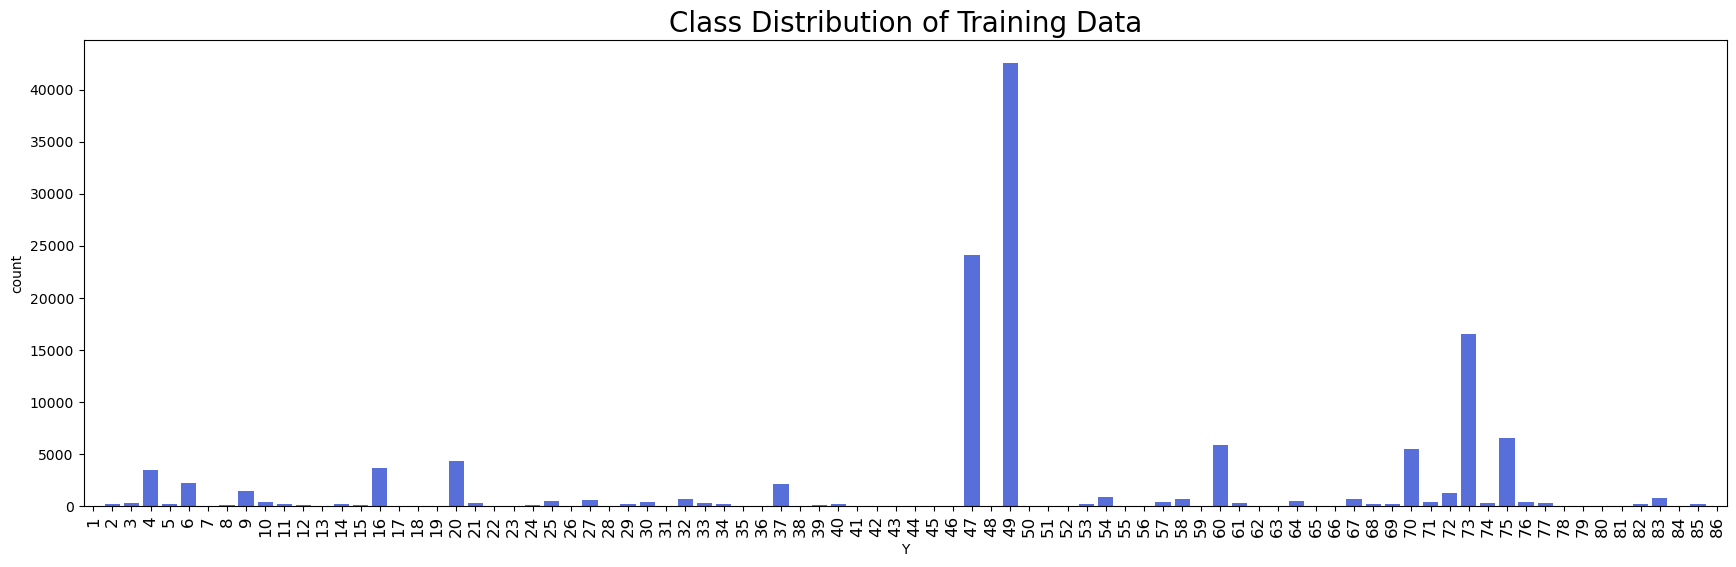

In [90]:
plt.figure(figsize=(18, 6))
sns.countplot(x=train_y, color="#4361ee")
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout(pad=3.0)
plt.title("Class Distribution of Training Data",  fontsize=20)
plt.savefig("train-data-class-distribution.png")
plt.show()

In [22]:
train_y.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86])

In [44]:
test_X = test.iloc[:, :-1]
test_y = test.iloc[:, -1]

In [45]:
test_y.value_counts()

Y
49    12108
47     6867
73     4873
75     1903
60     1652
      ...  
31        2
28        1
1         1
43        1
52        1
Name: count, Length: 85, dtype: int64

In [75]:
test_counter = Counter(test_y)
for k,v in test_counter.items():
	per = v / len(test_y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=47, n=6867 (17.901%)
Class=73, n=4873 (12.703%)
Class=60, n=1652 (4.306%)
Class=75, n=1903 (4.961%)
Class=49, n=12108 (31.562%)
Class=69, n=52 (0.136%)
Class=20, n=1170 (3.050%)
Class=70, n=1564 (4.077%)
Class=16, n=1114 (2.904%)
Class=71, n=133 (0.347%)
Class=74, n=76 (0.198%)
Class=4, n=984 (2.565%)
Class=9, n=404 (1.053%)
Class=6, n=631 (1.645%)
Class=64, n=166 (0.433%)
Class=44, n=4 (0.010%)
Class=32, n=205 (0.534%)
Class=77, n=106 (0.276%)
Class=37, n=635 (1.655%)
Class=83, n=245 (0.639%)
Class=30, n=131 (0.341%)
Class=24, n=26 (0.068%)
Class=31, n=2 (0.005%)
Class=27, n=186 (0.485%)
Class=33, n=101 (0.263%)
Class=58, n=187 (0.487%)
Class=29, n=72 (0.188%)
Class=57, n=151 (0.394%)
Class=67, n=178 (0.464%)
Class=5, n=62 (0.162%)
Class=25, n=141 (0.368%)
Class=11, n=63 (0.164%)
Class=76, n=98 (0.255%)
Class=72, n=358 (0.933%)
Class=85, n=68 (0.177%)
Class=54, n=254 (0.662%)
Class=10, n=131 (0.341%)
Class=21, n=88 (0.229%)
Class=86, n=7 (0.018%)
Class=18, n=18 (0.047%)
Class=8,

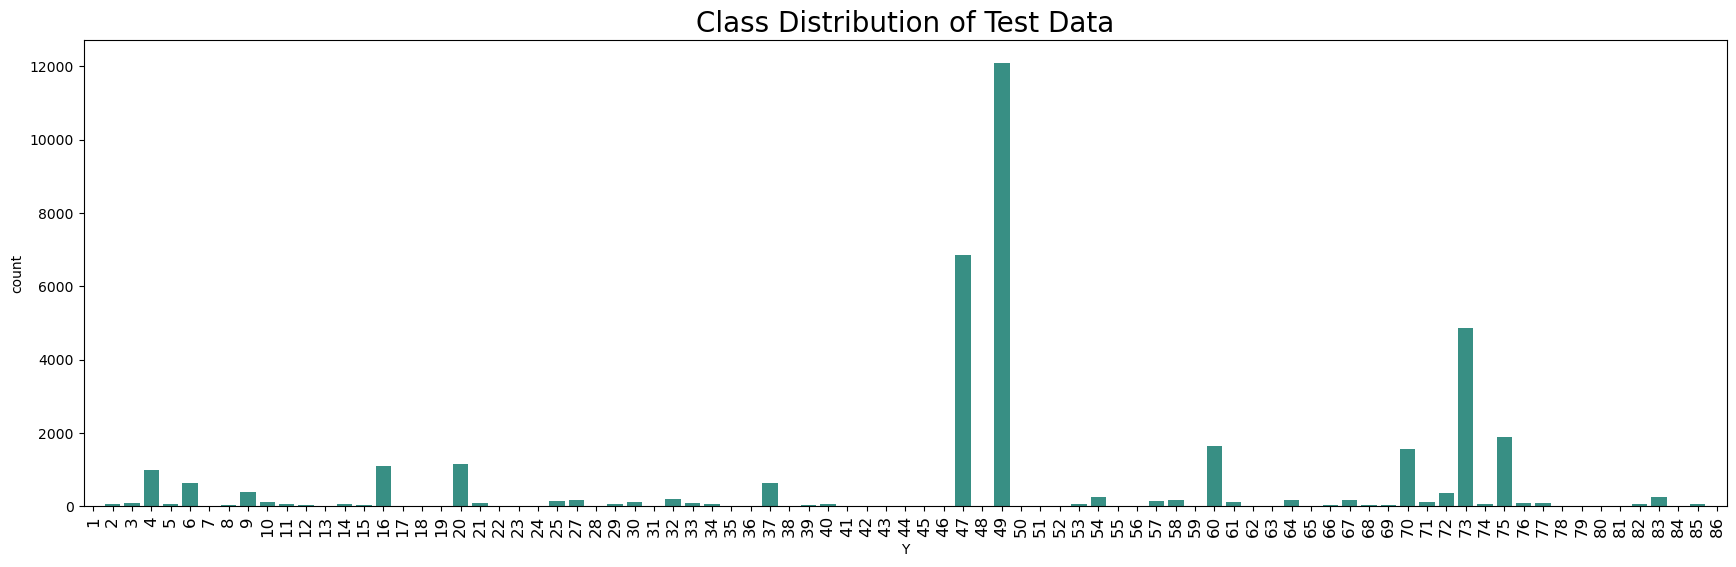

In [91]:
plt.figure(figsize=(18, 6))
sns.countplot(x=test_y, color="#2a9d8f")
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout(pad=3.0)
plt.title("Class Distribution of Test Data", fontsize=20)
plt.savefig("test-data-class-distribution.png")
plt.show()

In [47]:
valid_X = valid.iloc[:, :-1]
valid_y = valid.iloc[:, -1]

In [76]:
valid_y.value_counts()

Y
49    6051
47    3391
73    2397
75    1028
60     800
      ... 
42       1
52       1
46       1
44       1
26       1
Name: count, Length: 85, dtype: int64

In [77]:
valid_counter = Counter(valid_y)
for k,v in valid_counter.items():
	per = v / len(valid_y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=47, n=3391 (17.679%)
Class=49, n=6051 (31.547%)
Class=73, n=2397 (12.497%)
Class=70, n=752 (3.921%)
Class=60, n=800 (4.171%)
Class=75, n=1028 (5.359%)
Class=20, n=618 (3.222%)
Class=16, n=572 (2.982%)
Class=37, n=316 (1.647%)
Class=38, n=2 (0.010%)
Class=58, n=117 (0.610%)
Class=9, n=213 (1.110%)
Class=25, n=78 (0.407%)
Class=34, n=25 (0.130%)
Class=10, n=51 (0.266%)
Class=4, n=501 (2.612%)
Class=5, n=30 (0.156%)
Class=32, n=119 (0.620%)
Class=8, n=20 (0.104%)
Class=64, n=91 (0.474%)
Class=77, n=51 (0.266%)
Class=68, n=31 (0.162%)
Class=76, n=57 (0.297%)
Class=21, n=42 (0.219%)
Class=61, n=46 (0.240%)
Class=74, n=47 (0.245%)
Class=67, n=79 (0.412%)
Class=72, n=194 (1.011%)
Class=55, n=12 (0.063%)
Class=11, n=26 (0.136%)
Class=3, n=46 (0.240%)
Class=83, n=125 (0.652%)
Class=54, n=129 (0.673%)
Class=17, n=13 (0.068%)
Class=69, n=23 (0.120%)
Class=30, n=60 (0.313%)
Class=6, n=323 (1.684%)
Class=53, n=34 (0.177%)
Class=71, n=77 (0.401%)
Class=85, n=39 (0.203%)
Class=14, n=42 (0.219%)

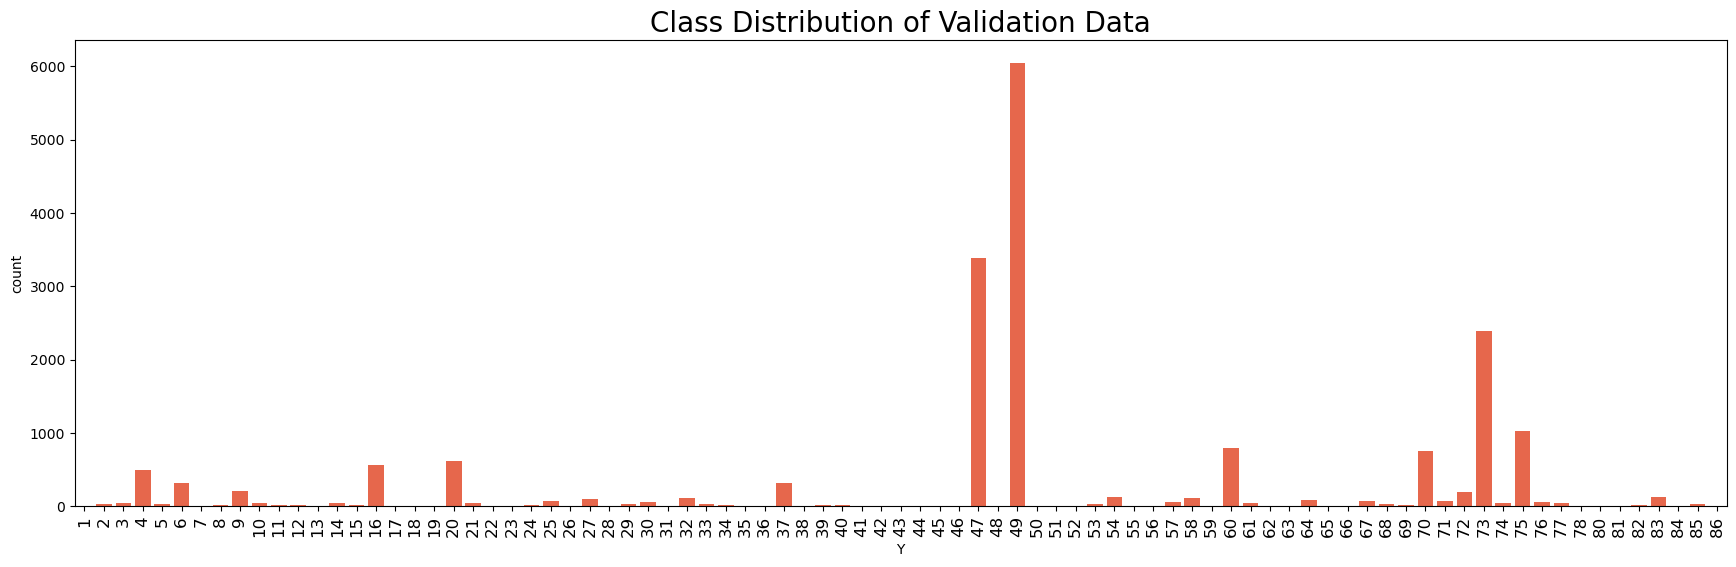

In [92]:
plt.figure(figsize=(18, 6))
sns.countplot(x=valid_y, color="#ff5733")
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout(pad=3.0)
plt.title("Class Distribution of Validation Data",  fontsize=20)
plt.savefig("validation-data-class-distribution.png")
plt.show()


### To know what type of relation the label index corresponds to,run the cell below

In [25]:
from tdc.utils import get_label_map


In [ ]:
get_label_map(name = 'DrugBank', task = 'DDI')

# Featurisation

In [27]:
%run '../scripts/featuriser.py'

Fetching model eos4wt0...
Model fetched successfully
🚀 Serving model eos4wt0: morgan-fps

   URL: http://0.0.0.0:52469
   PID: -1
   SRV: pulled_docker
   Output source: local-only

👉 To run model:
   - run

💁 Information:
   - info
Ersilia model server is running
Processing ../data/train.csv...
Featurizing Drug1 from ../data/train.csv...
Successfully featurized Drug1 in ../data/train.csv
Featurizing Drug2 from ../data/train.csv...
Successfully featurized Drug2 in ../data/train.csv
Featurized data saved to ../data/featurised_train.csv
Deleted temporary file: ../data/train_drug1.csv
Deleted temporary file: ../data/train_drug1_feat.csv
Deleted temporary file: ../data/train_drug2.csv
Deleted temporary file: ../data/train_drug2_feat.csv
Processing ../data/valid.csv...
Featurizing Drug1 from ../data/valid.csv...
Successfully featurized Drug1 in ../data/valid.csv
Featurizing Drug2 from ../data/valid.csv...
Successfully featurized Drug2 in ../data/valid.csv
Featurized data saved to ../data/fe